In [1]:
# pandas for data set manipulation, seaborn and matplotlib for visualization 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# parse dates as datetime data type for time related manipulation
# original data isn't in order, sort it by ticker and then date
data = pd.read_csv('data.csv', parse_dates=['date']).sort_values(by=['ticker_exchange', 'date'])
data.iloc[:, 1:]

,date,price,entrVal,shares,fcfNtm,epsNtm,ebitdaNtm,ebitNtm,salesNtm,roe,...,priceReturn6M,priceReturn12M,priceReturnYTD,sales_med_CY0,sales_med_CY3,netIncNtm,netIncLtm,cffoNtm,salesCY0,salesCY3
19117,2015-02-28,42.210,13725.559690,335.810300,849.89980,1.793398,899.10240,789.17770,4146.689000,6.445615,...,0.028717,0.047335,0.031021,6981.0,4505.0,603.51260,881.24440,773.32117,4693.830000,4501.13900
19118,2015-03-31,41.550,13495.905140,335.810300,898.67370,1.814318,906.34784,798.34330,4155.645500,6.445615,...,0.019741,0.039071,0.014900,6981.0,4499.0,609.57324,840.36810,822.03620,4693.830000,4483.62900
19119,2015-04-30,41.370,13354.459240,333.000000,720.77500,1.826550,903.69540,804.56866,4155.111000,5.335241,...,0.065043,0.070561,0.010503,6981.0,4470.0,614.30273,801.60800,633.52460,4639.057600,4458.11000
19120,2015-05-31,41.190,13294.013340,333.000000,573.01150,1.852680,921.69910,813.42706,4160.717300,5.335241,...,-0.036266,0.011260,0.006106,6981.0,4452.0,619.27770,765.56433,670.08820,4665.578000,4446.86200
19121,2015-06-30,38.580,12316.547430,333.000000,597.82460,1.881969,930.02203,824.71466,4178.502000,5.335241,...,-0.067440,-0.060733,-0.057645,6981.0,4452.0,627.59710,725.49146,695.97670,4697.260300,4452.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105089,2019-11-30,39.256,74853.386540,1472.656000,NaN,3.017557,6100.60700,5784.20170,49596.195000,NaN,...,0.214867,0.246856,0.320328,NaN,NaN,4551.32900,4078.95530,NaN,47038.000000,50865.76600
115879,2019-12-31,41.008,77475.097550,149.608030,NaN,3.047118,6131.68100,5841.47360,49992.070000,NaN,...,0.176295,0.379255,0.379255,NaN,NaN,4598.05960,4137.48900,NaN,48651.555000,NaN
123692,2020-01-31,41.547,78281.628370,149.608030,3289.99460,3.048824,6312.71900,5706.09500,50011.086000,NaN,...,0.187057,0.322395,0.013144,NaN,NaN,4532.48100,4032.85500,NaN,48766.734000,53032.66800
113235,2020-02-10,42.786,80511.862840,149.608030,3289.99460,3.057018,6323.65630,5941.28860,50208.605000,NaN,...,0.206526,0.362652,0.049502,NaN,NaN,4537.97850,4061.06790,NaN,48802.035000,52410.50000


In [3]:
def returns_df_hist(data: pd.DataFrame, metric: str, value: float, timeframe: int):
    
    '''
    Plots a histogram of return frequency distribution of all stocks together and returns a dataframe with the bins
    and their frequencies
    
    Parameters
    ----------
    df : pd.DataFrame
        A pd.DataFrame of the data set provided
    metric : str
        The financial data metric of interest
    value : float
        The minimum value of the metric for the stock to classified in the universe under consideration
    timeframe : int
        The time range for which returns are to be computed
    
    Returns
    -------
    pd.DataFrame
        Df with binned frequencies of stock returns
    '''
#     set all columns lowercase for compatibility with the metric argument
    data.columns = data.columns.str.lower()
    
#     try except block in case ratio provided by user is there as 2 separate metric columns in df

    try:
#         lowercase the metric string and split it on the / sign
        metric = metric.lower()
        measures = metric.split('/')
        
#         create new column of desired metric by dividing 2 ratios 
        data[metric] = data[measures[0]] / data[measures[1]]
    except IndexError:
        pass

#     compute future returns for the timeframe
    def compute_returns(df, timeframe):
        df['price'] = df['price'].pct_change(timeframe).shift(-timeframe).dropna()
        
        return df 
         
#     group by ticker and apply the compute_returns helper function  
    df = data.groupby(['ticker_exchange']).apply(lambda x: compute_returns(x, timeframe))
    
#     select all the rows where value of the metric is greater than the threshold
    df = df[df[metric] >= value]
    
#     select only the price column as a dataframe
    df = df[['price']]
    
#     round by 2 to give percent terms 
    df['price'] = round(df['price'] * 100, 2)
    
#     plot the histogram of price returns
    sns.displot(df['price'])
    plt.title('Returns Over {} Months'.format(timeframe))
    plt.xlabel("Monthly Returns (%)")
    plt.ylabel("Frequency")
    
#     set bins from -50% to 50% returns with 10% intervals
    bins = range(-50, 50, 10)
    
#     create column bins which contains the bin that its corresponding price return falls in
    df['bins'] = pd.cut(df['price'], bins=bins, right=True)
    
#     value_counts returns the frequencies for each bin, with the bins column as index
#     convert to pd.DataFrame and reset bins from index to column and rename appropriately
    df = pd.DataFrame(df['bins'].value_counts()).reset_index().rename(columns={'index':'bins', 'bins':'frequencies'})
    
    return df

,bins,frequencies
0,"(0, 10]",32972
1,"(-10, 0]",28066
2,"(10, 20]",16679
3,"(-20, -10]",11882
4,"(20, 30]",5163
5,"(-30, -20]",3695
6,"(30, 40]",1508
7,"(-40, -30]",1030
8,"(-50, -40]",319


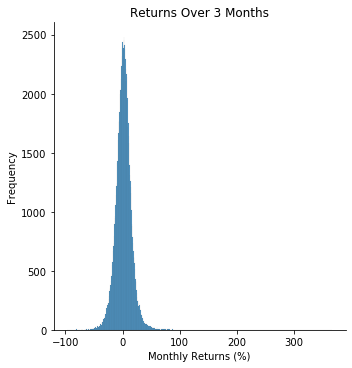

In [4]:
returns_df_hist(data, 'price/epsNTM', 5.0, 3)

,bins,frequencies
0,"(0, 10]",20313
1,"(-10, 0]",17777
2,"(10, 20]",14806
3,"(-20, -10]",10784
4,"(20, 30]",7842
5,"(-30, -20]",4976
6,"(30, 40]",3512
7,"(-40, -30]",2124
8,"(-50, -40]",838


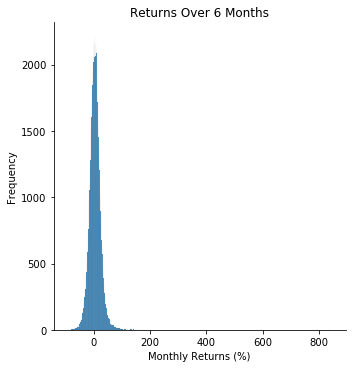

In [5]:
returns_df_hist(data, 'entrVal/ebitdaNTM', 4.0, 6)

,bins,frequencies
0,"(0, 10]",3350
1,"(-10, 0]",3095
2,"(10, 20]",2397
3,"(-20, -10]",2017
4,"(20, 30]",1586
5,"(-30, -20]",947
6,"(30, 40]",835
7,"(-40, -30]",533
8,"(-50, -40]",280


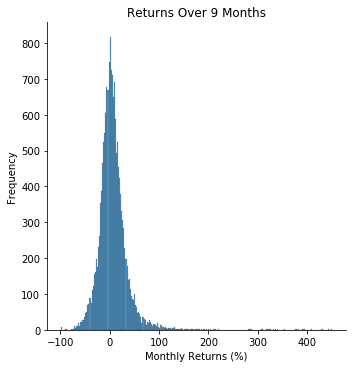

In [6]:
returns_df_hist(data, 'entrVal/salesNTM', 7, 9)

,bins,frequencies
0,"(0, 10]",3093
1,"(10, 20]",2861
2,"(-10, 0]",2829
3,"(20, 30]",2299
4,"(-20, -10]",2106
5,"(30, 40]",1589
6,"(-30, -20]",1369
7,"(-40, -30]",781
8,"(-50, -40]",352


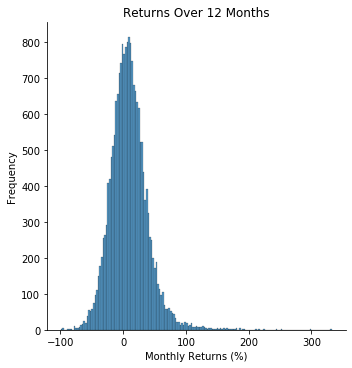

In [7]:
returns_df_hist(data, 'roe', 20.0, 12)

,bins,frequencies
0,"(0, 10]",502
1,"(10, 20]",420
2,"(-10, 0]",401
3,"(20, 30]",346
4,"(-20, -10]",305
5,"(30, 40]",271
6,"(-30, -20]",175
7,"(-40, -30]",105
8,"(-50, -40]",53


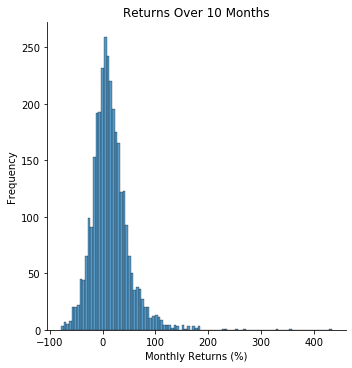

In [8]:
returns_df_hist(data, 'pB', 20.0, 10)